In [2]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

# [basic-Operation-on-image](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html#basic-ops)

* Access pixel values and modify them
* Access image properties
* Setting Region of Image (ROI)
* Splitting and Merging images

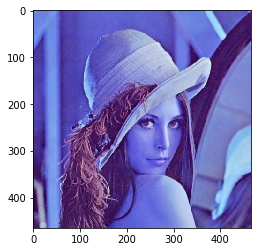

In [2]:
img = cv2.imread('lena-465x465.jpg')
plt.imshow(img)

In [7]:
px = img[100,100]
print(px)

[ 84  78 187]


In [8]:
# accessing only blue pixel
blue = img[100,100,0]
print(blue)

84


In [9]:
# modify the pixel values the same way
img[100,100] = [255,255,255]
print(img[100,100])

[255 255 255]


In [10]:
# accessing RED value
img.item(10,10,2)

227

In [11]:
# modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)

100

In [12]:
# Accessing Image Properties
print(img.shape)

(465, 465, 3)


In [14]:
print(465*465*3)
print(img.size)

648675
648675


In [15]:
print(img.dtype)

uint8


## Image ROI
Sometimes, you will have to play with certain region of images. For eye detection in images, first perform face detection over the image until the face is found, then search within the face region for eyes. This approach improves accuracy (because eyes are always on faces :D ) and performance (because we search for a small area).
* ROI is again obtained using Numpy indexing. Here I am selecting the ball and copying it to another region in the image:


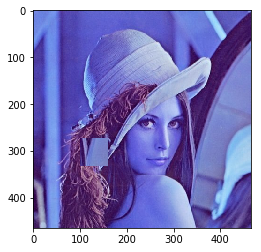

In [16]:
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball
plt.imshow(img)

# Splitting and Merging Image Channels
The B,G,R channels of an image can be split into their individual planes when needed. Then, the individual channels can be merged back together to form a BGR image again. This can be performed by:

In [18]:
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

In [3]:
b = img[:,:,0]

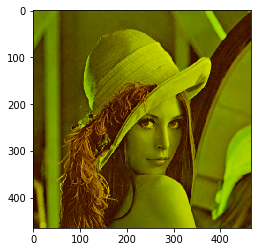

In [5]:
# Suppose, you want to make all the red pixels to zero, you need not split like this and put it equal to zero. 
# You can simply use Numpy indexing which is faster.
img[:,:,2] = 0
plt.imshow(img)

# Making Borders for Images (Padding)


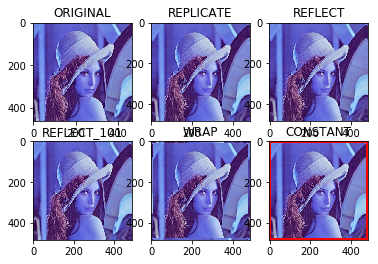

In [3]:
BLUE = [255,0,0]

img1 = cv2.imread('lena-465x465.jpg')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()